In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

from sabreMod import sosf,sosfn
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"


ISIS red arm

In [2]:
Red=dict()
Red[0]='Obs\ISIS.604.Red.txt'
DataR=pd.read_table(Red[0])
DataR=DataR.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataR

,Pos,Slit,X,Y,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1,1,199.81,19.6,604R1_778-001004.xlsx,6560.006,0.419,3.152,0.760,-19.79,...,6.9110,9.8280,6724.307,1.618,2.765,2.312,-3.363,3.125,-9.896,-12.140
1,2,1,198.47,19.6,604R1_778-005008.xlsx,6559.806,0.427,3.849,1.260,-18.81,...,1.5190,0.0000,6726.936,0.812,2.295,1.196,4.827,3.316,11.790,8.589
2,3,1,197.13,19.6,604R1_778-009012.xlsx,6565.844,6.249,28.117,18.167,-16.44,...,-7.2300,-6.1340,6723.383,0.606,1.294,0.730,2.938,4.510,4.045,7.195
3,4,1,195.79,19.6,604R1_778-013016.xlsx,6563.614,1.206,22.266,4.208,-14.54,...,-0.1011,-0.5723,6725.799,0.636,1.021,0.724,-8.003,6.818,-8.701,-7.102
4,5,1,194.45,19.6,604R1_778-017020.xlsx,6560.380,0.479,3.310,0.990,-16.68,...,-20.7700,-12.5400,6728.612,0.685,3.266,1.290,-4.778,3.152,-16.610,-9.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,146,10,5.36,0.0,604R10_796-581584.xlsx,6562.497,1.075,25.496,4.464,-16.81,...,12.7500,4.8210,6726.949,0.155,0.835,0.259,-6.647,4.902,-5.906,-4.347
1496,147,10,4.02,0.0,604R10_796-585588.xlsx,6559.596,0.502,2.088,1.022,-14.64,...,-32.3900,-237.2000,6732.367,0.000,0.196,0.000,8.149,0.000,1.704,4.226
1497,148,10,2.68,0.0,604R10_796-589592.xlsx,6555.097,0.403,1.710,0.586,-13.80,...,-34.2900,-13.9000,6730.058,1.412,7.141,3.258,3.012,1.870,22.900,19.520
1498,149,10,1.34,0.0,604R10_796-593596.xlsx,6559.274,0.471,2.991,0.726,-17.67,...,8.3980,12.5800,6728.062,1.317,3.541,2.472,3.947,3.851,14.880,11.680


In [3]:
i=0#Halfa
DtR=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC.0"],DataR["Width.0"],DataR["ErrW.0"],DataR["Peak.0"],DataR["ErrP.0"],DataR["Line.0"],DataR["ErrL.0"]]
DtR=pd.DataFrame(DtR).T
DtR.describe()

,X,Y,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,ErrP.0,Line.0,ErrL.0
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,99.905000,9.390000,6545.146602,0.416048,4.237746,1.101124,918.511798,65.356438,671.348901,-5.996420
std,58.085176,6.252917,293.122440,1.884915,18.000542,6.619479,2622.445442,1813.485880,5480.012094,1009.630623
min,0.000000,0.000000,0.000000,0.000000,-163.657000,0.000000,-5108.000000,0.000000,-145500.000000,-11000.000000
25%,49.620000,4.000000,6556.728750,0.010750,0.903750,0.026000,-14.560000,4.674500,-49.972500,-14.250000
50%,99.905000,9.000000,6556.955000,0.080000,1.164500,0.182500,47.305000,8.388000,12.445000,6.351500
75%,150.190000,15.000000,6559.467250,0.413000,2.711250,0.721500,614.875000,10.755000,618.450000,11.145000
max,199.810000,19.600000,6619.496000,40.615000,297.391000,205.945000,30960.000000,70160.000000,27450.000000,35090.000000


ISIS Blue arm

In [4]:
Blue=dict()
Blue[0]='Obs\ISIS.604.Blue.txt'
DataB=pd.read_table(Blue[0])
DataB=DataB.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataB

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.1,ErrL.1,Center.2,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2
0,1,214.5600,19.6,1,604a1_779-001004.xlsx,4809.715,10.003,-14.310,0.000,2.583,...,10.250,17.820,4961.214,27.812,41.454,52.778,0.6969,0.4512,30.75,53.460
1,2,213.1296,19.6,1,604a1_779-005008.xlsx,4861.424,10.792,-4.098,51.891,-4.734,...,-8.312,-8.531,4998.893,0.692,4.125,0.000,-5.6790,0.0000,-24.94,-25.590
2,3,211.6992,19.6,1,604a1_779-009012.xlsx,4855.140,0.822,2.562,1.256,-5.215,...,-64.520,-22.320,5022.750,12.843,69.658,32.632,-2.6100,0.7990,-193.60,-66.960
3,4,210.2688,19.6,1,604a1_779-013016.xlsx,4852.843,0.305,-1.164,0.923,-9.482,...,-3.841,-1.507,5004.753,0.192,0.961,0.346,-11.2600,4.0020,-11.52,-4.521
4,5,208.8384,19.6,1,604a1_779-017020.xlsx,4875.295,0.294,0.489,0.375,8.143,...,-1.367,-4.403,5004.175,0.000,0.787,0.000,-4.8920,0.0000,-4.10,-13.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,146,7.1520,0.0,10,604a10_797-581584.xlsx,4856.928,0.161,-0.627,0.279,-14.500,...,69.770,28.860,5030.822,19.344,-94.366,32.250,-2.0840,0.4448,209.30,86.570
1496,147,5.7216,0.0,10,604a10_797-585588.xlsx,4857.439,1.123,5.041,2.315,-5.168,...,-6.108,-2.878,5000.963,0.715,2.900,1.353,-5.9360,2.7850,-18.32,-8.635
1497,148,4.2912,0.0,10,604a10_797-589592.xlsx,4856.136,0.844,2.055,1.016,-4.560,...,-9.537,-3.753,5005.201,0.987,4.789,2.062,-5.6130,2.7540,-28.61,-11.260
1498,149,2.8608,0.0,10,604a10_797-593596.xlsx,4854.656,0.306,0.592,0.236,18.680,...,-3755.000,-8549.000,5138.393,315.693,843.770,577.680,-12.5400,21.6200,-11270.00,-25650.000


In [5]:
i=0#Habeta
DtB=[DataB.X, DataB.Y,DataB["Center."+str(i)],DataB["ErrC.0"],DataB["Width.0"],DataB["ErrW.0"],DataB["Peak.0"],DataB["ErrP.0"],DataB["Line.0"],DataB["ErrL.0"]]
DtB=pd.DataFrame(DtB).T
DtB.describe()

,X,Y,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,ErrP.0,Line.0,ErrL.0
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1.497000e+03,1.500000e+03
mean,107.995200,9.390000,4347.492679,1.648359,4.941869,2.567367,4.814361e+08,34.088070,3.368841e+07,4.972339e+06
std,61.957416,6.252917,1487.022872,14.715628,64.232010,18.182714,1.863163e+10,452.172152,1.304695e+09,1.928491e+08
min,1.430400,0.000000,0.000000,0.000000,-453.109000,0.000000,-1.246000e+07,0.000000,-4.738000e+07,-9.960000e+06
25%,54.355200,4.000000,4854.936250,0.027000,0.180750,0.061000,-4.089000e+00,1.663000,-7.792000e+00,-4.792500e+00
50%,107.995200,9.000000,4856.948500,0.157000,0.964000,0.333000,3.890000e+00,3.662000,6.719000e+00,4.190000e+00
75%,161.635200,15.000000,4857.498000,0.678000,2.032250,1.113250,1.934500e+01,5.375750,2.200000e+01,6.630500e+00
max,214.560000,19.600000,4897.231000,510.182000,1210.918000,480.166000,7.216000e+11,12720.000000,5.048000e+10,7.469000e+09


Halfa

Peak

(0.0, 150.0, 0.0, 10.0)

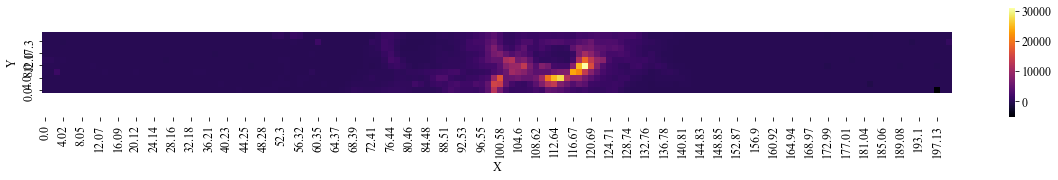

In [6]:
data_P=(DtR.round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 60.0, 0.0, 10.0)

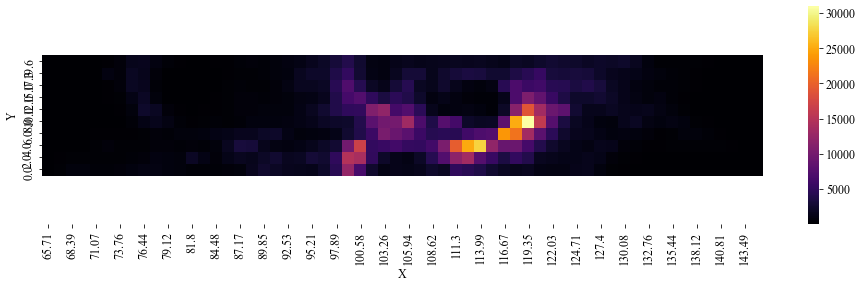

In [7]:
mPR=(DtR.X>65)&(DtR.X<145)&(DtR["Peak.0"]>0)
data_PR=(DtR[mPR].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=4
wd=DtR[mPR].X.max()-DtR[mPR].X.min()
hd=DtR[mPR].Y.max()-DtR[mPR].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PR, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Heliocentric Radial velocity 

In [8]:
l=[6562.8]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(DtR["Center.0"]-l)/l
RV=RVo+corrhelio

DtR=DtR.assign(RV=RV.values)

(0.0, 60.0, 0.0, 10.0)

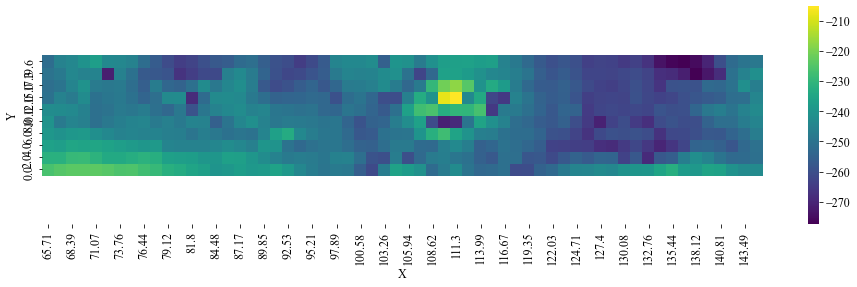

In [9]:
data_VR=(DtR[mPR].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

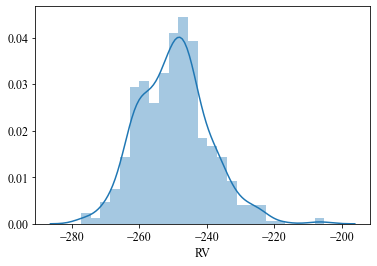

In [10]:
sns.distplot(DtR.RV[mPR],bins=25)

(0.0, 60.0, 0.0, 10.0)

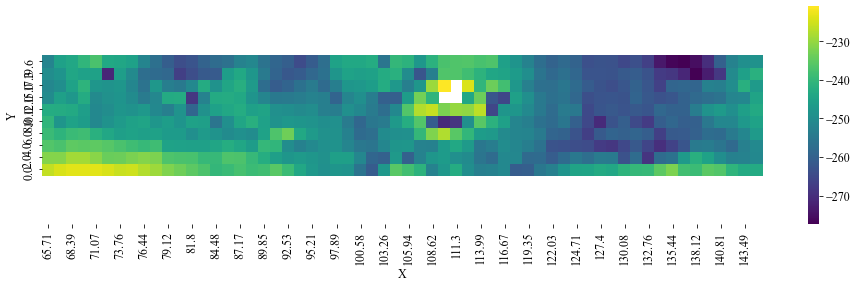

In [11]:
DtR=DtR[mPR]
mRI=(DtR.RV>-280)&(DtR.RV<-220)

data_VB0=(DtR[mRI].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB0, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

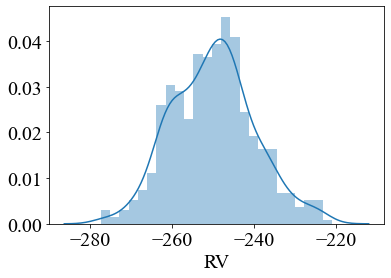

In [66]:
sns.distplot(DtR.RV[mRI],bins=25)

In [12]:
DtR=DtR[mRI]

Sigma

In [13]:
T=8350#K Table 5

Xw=1.00794#
SI=18#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(DtR["Width.0"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

DtR=DtR.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-14-a918e84c29c6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_SR=(DtR[mPR].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat


(0.0, 60.0, 0.0, 10.0)

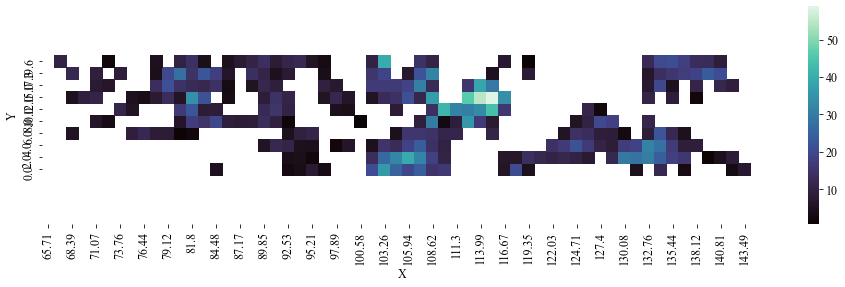

In [14]:
data_SR=(DtR[mPR].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SR, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

<ipython-input-15-eca335262d52>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(DtR[mPR].Sig,bins=25)


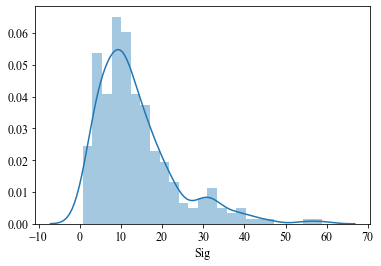

In [15]:
sns.distplot(DtR[mPR].Sig,bins=25)

Hbeta

Peak

(0.0, 150.0, 0.0, 10.0)

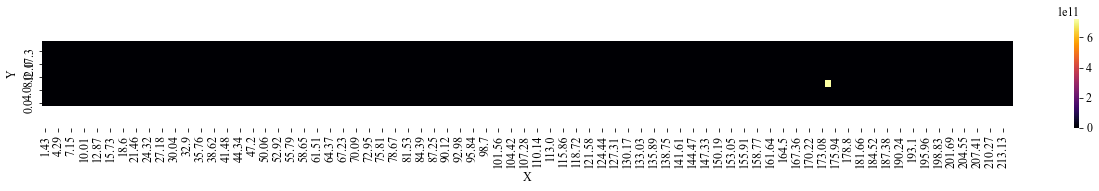

In [16]:
data_PB=(DtB.round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=2
wd=DataB.X.max()-DataB.X.min()
hd=DataB.Y.max()-DataB.Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PB, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

<ipython-input-17-f84da639f60d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wd=DtR[mPB].X.max()-DtR[mPB].X.min()
<ipython-input-17-f84da639f60d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hd=DtR[mPB].Y.max()-DtR[mPB].Y.min()


(0.0, 26.0, 0.0, 9.0)

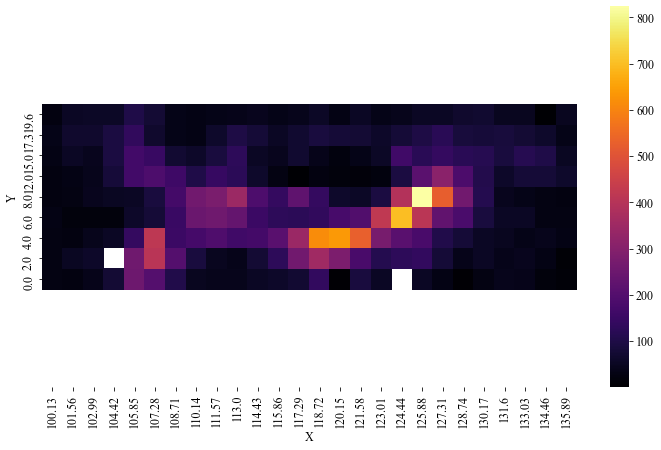

In [17]:
mPB=(DtB.X>100)&(DtB.X<137)&(DtB["Peak.0"]>0)&(DtB["Peak.0"]<2000)
data_PB=(DtB[mPB].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

sz=7
wd=DtR[mPB].X.max()-DtR[mPB].X.min()
hd=DtR[mPB].Y.max()-DtR[mPB].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PB, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

In [18]:
l=[4861.36]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(DtB["Center.0"]-l)/l
RV=RVo+corrhelio

DtB=DtB.assign(RV=RV.values)

(0.0, 26.0, 0.0, 9.0)

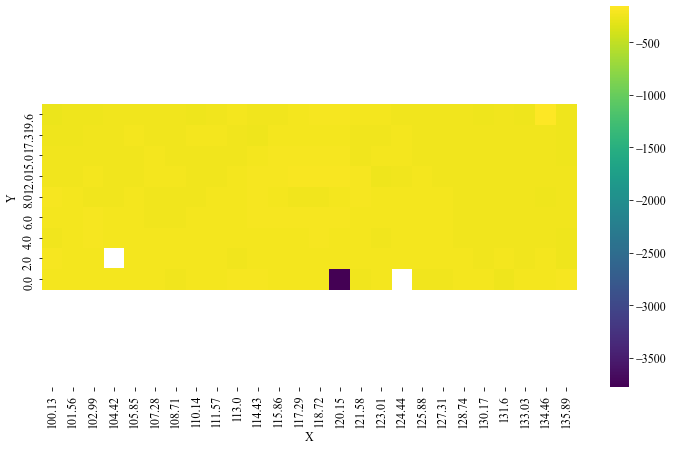

In [19]:
data_VB=(DtB[mPB].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

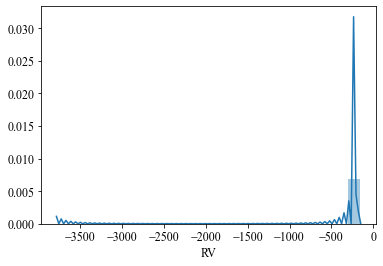

In [20]:
sns.distplot(DtB[mPB].RV,bins=25)

(0.0, 26.0, 0.0, 9.0)

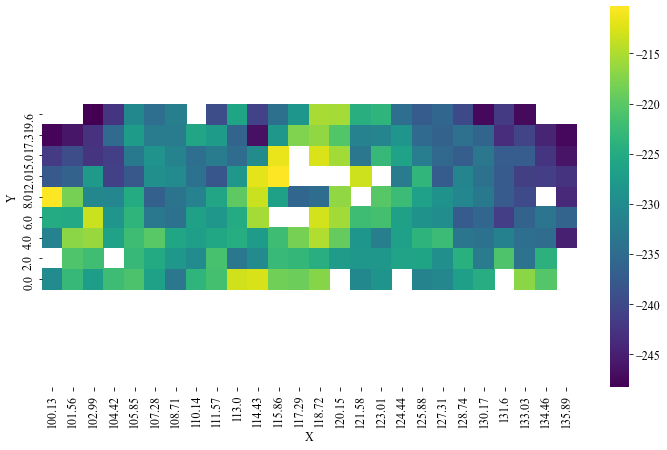

In [21]:
DtBI=DtB[mPB]
mRB=((DtBI["RV"]>-250))&((DtBI["RV"]<-210))

data_VB=(DtBI[mRB].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

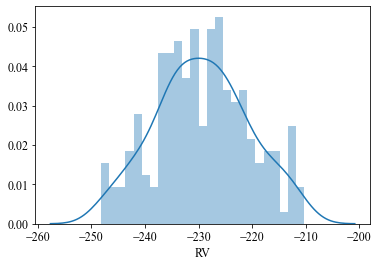

In [22]:
sns.distplot(DtBI[mRB].RV,bins=25)

In [23]:
T=8350#K Table 5

Xw=1.00794#
SI=18#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(DtBI["Width.0"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

DtBI=DtBI.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 26.0, 0.0, 9.0)

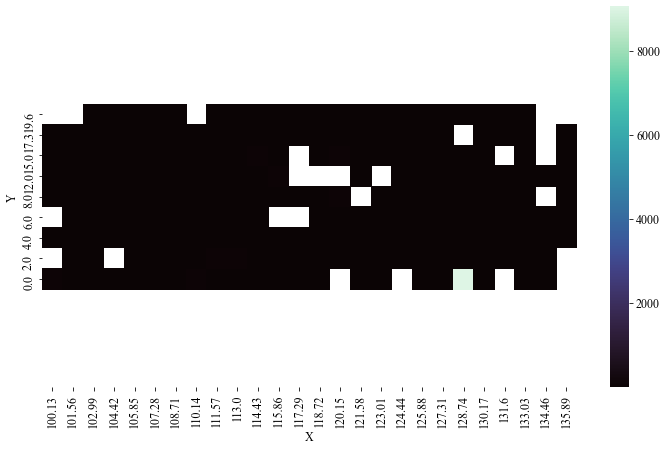

In [24]:
data_SB=(DtBI[mRB].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

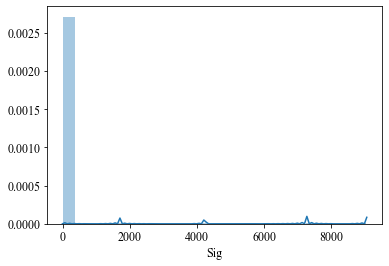

In [25]:
sns.distplot(DtBI.Sig,bins=25)

In [26]:
DtBII=DtBI[mRB]
mSB=((DtBII["Sig"]<100))

(0.0, 26.0, 0.0, 9.0)

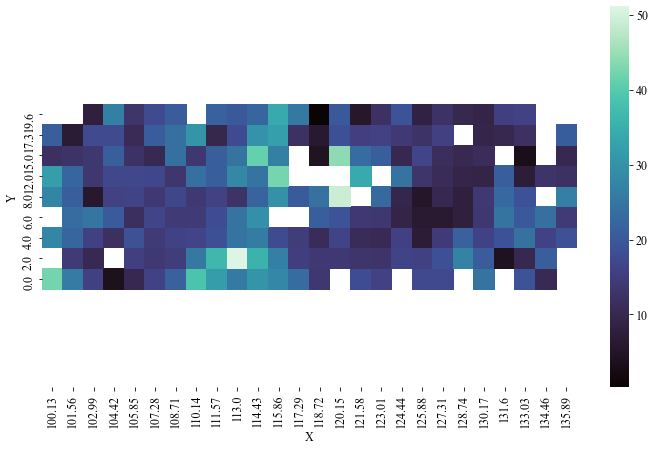

In [27]:
data_SB=(DtBII[mSB].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

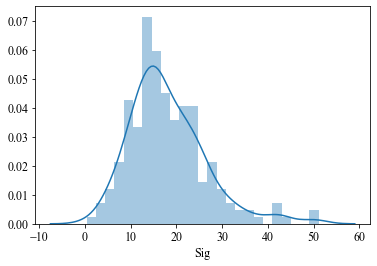

In [28]:
sns.distplot(DtBII[mSB].Sig,bins=25)

Comparison

Matching zones

Halfa

(0.0, 27.0, 0.0, 10.0)

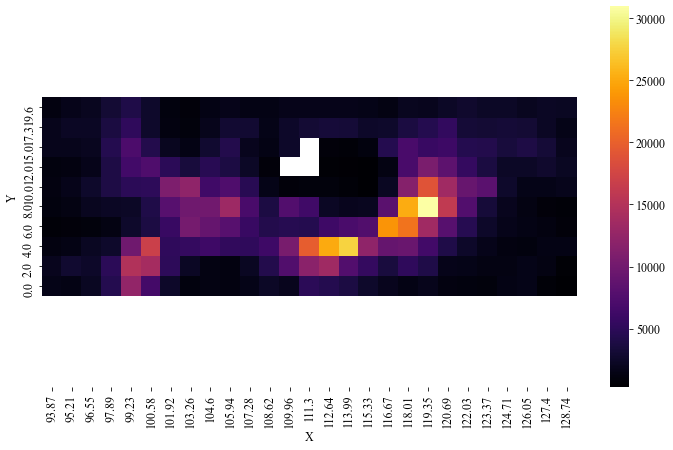

In [29]:
mPIR=(DtR.X>93)&(DtR.X<130)
data_PR2=(DtR[mPIR].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PR2, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 27.0, 0.0, 10.0)

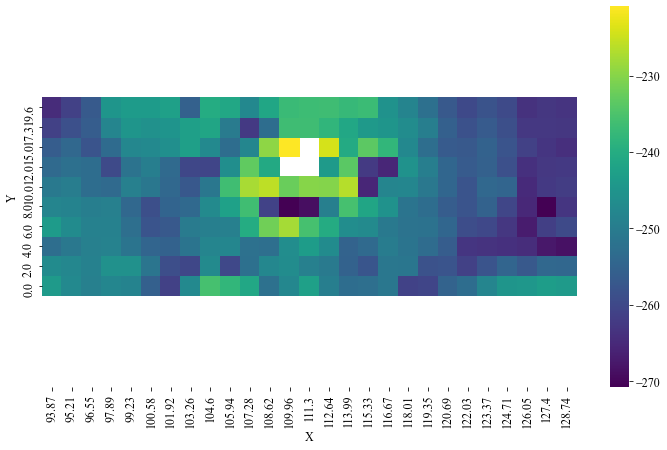

In [30]:
data_VR2=(DtR[mPIR].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR2, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 27.0, 0.0, 10.0)

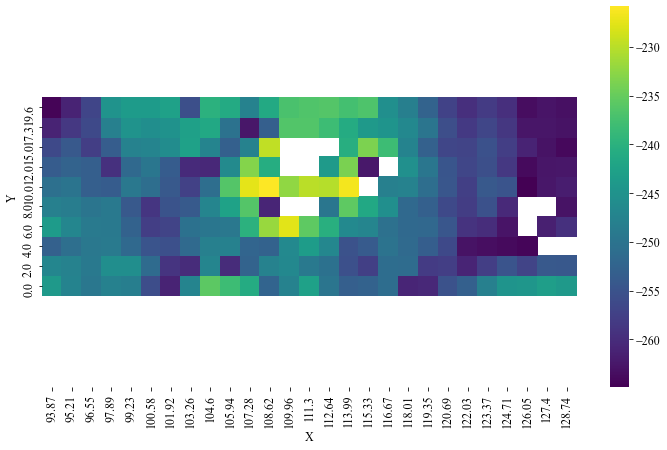

In [31]:
DtRII=DtR[mPIR]
mVR=(DtRII.RV>-265)&(DtRII.RV<-225)
data_VR2=(DtRII[mVR].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR2, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

Hbeta

(0.0, 26.0, 0.0, 9.0)

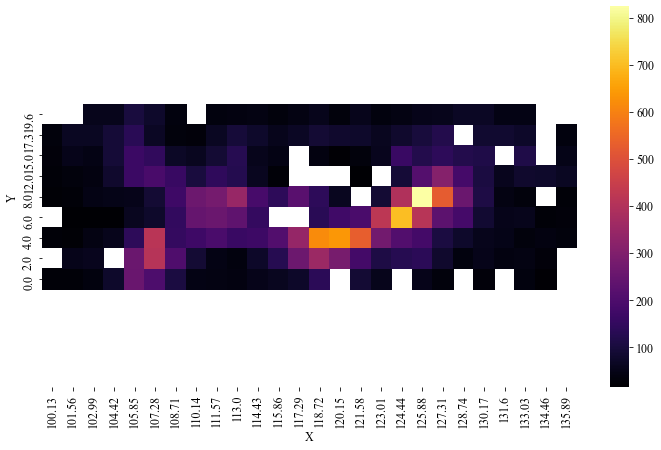

In [32]:
mPB=(DtB.X>100)&(DtB.X<137)&(DtB["Peak.0"]>0)&(DtB["Peak.0"]<2000)
data_PB=(DtBII[mSB].round(2)).pivot(index='Y', columns='X', values='Peak.0')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_PB, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 26.0, 0.0, 9.0)

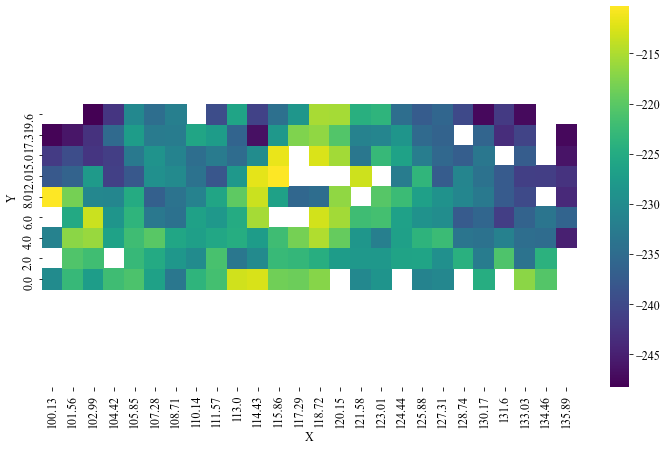

In [33]:
data_RB2=(DtBII[mSB].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_RB2, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

In [34]:
DtRc=DtRII[mVR]
DtBc=DtBII[mSB]

Peak

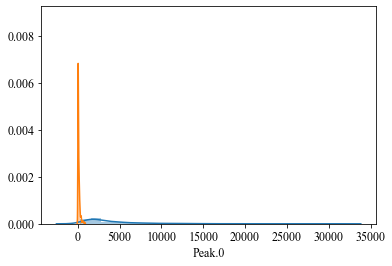

In [35]:
sns.distplot(DtRc["Peak.0"],bins=25)
sns.distplot(DtBc["Peak.0"],bins=25)

Normalize emission

In [36]:
PeakN=DtRc["Peak.0"]/DtRc["Peak.0"].max()
DtRc=DtRc.assign(PeakN=PeakN.values)

In [37]:
PeakN=DtBc["Peak.0"]/DtBc["Peak.0"].max()
DtBc=DtBc.assign(PeakN=PeakN.values)

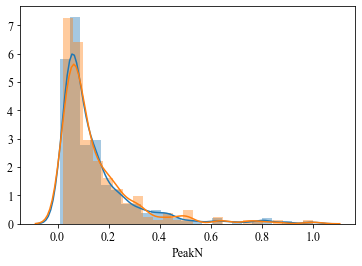

In [38]:
sns.distplot(DtRc["PeakN"],bins=25)
sns.distplot(DtBc["PeakN"],bins=25)

Radial Velocity

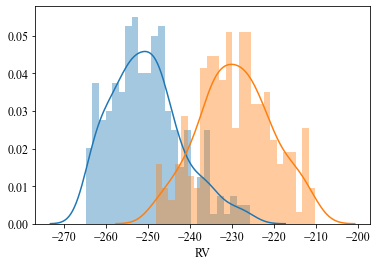

In [39]:
sns.distplot(DtRc.RV,bins=25)
sns.distplot(DtBc.RV,bins=25)

Sigma

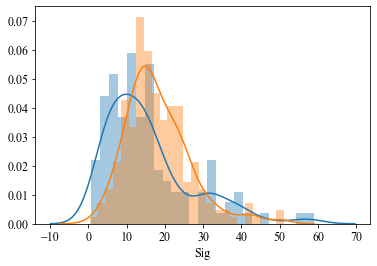

In [40]:
sns.distplot(DtRc.Sig,bins=25)
sns.distplot(DtBc.Sig,bins=25)

Structure Function

In [41]:
pc=4.16

1.339999999999975


[None, None]

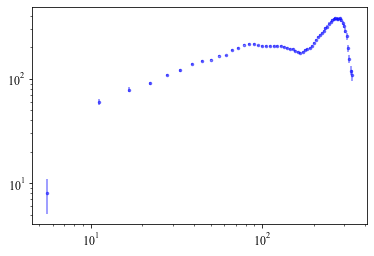

In [42]:
SF=sosf(DtR)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [43]:
x=SF['Lag']
y=SF['Nmqvd']-(DtR[mPR]["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

<ipython-input-43-811fe07cbc5b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y=SF['Nmqvd']-(DtR[mPR]["RV"].std())**2


array([25.51712195])

In [44]:
s=SFr[0]

In [45]:
ss=np.round((DtR[mPR]["RV"].std())**2,2)

<ipython-input-45-0cab2f4021ec>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ss=np.round((DtR[mPR]["RV"].std())**2,2)


<ipython-input-46-ed4aa1070e7a>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  r'$σ_{POS}=%.2f$' % (DtR[mPR]["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtR[mPR]["Sig"].std()) + ' [km/s]' ))


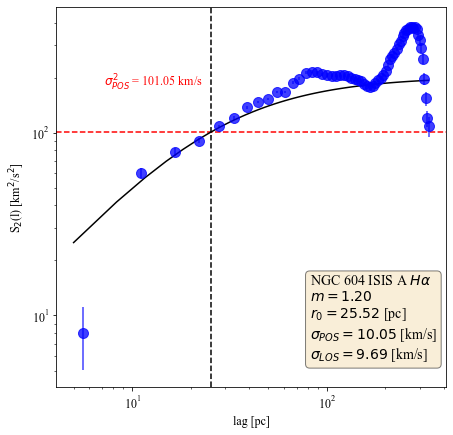

In [46]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.2

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 604 ISIS A ' r'$H\alpha$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (DtR[mPR]["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtR[mPR]["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [47]:
SFHa=SF

1.3399999999999892


[None, None]

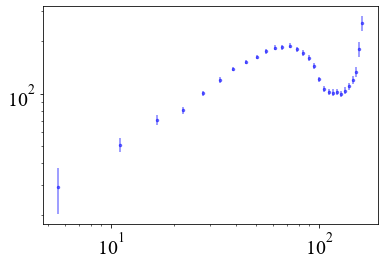

In [48]:
SF=sosf(DtRc)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [49]:
SFn=sosfn(DtRc)

1.3399999999999892


In [50]:
x=SF['Lag']
y=SF['Nmqvd']-(DtRc["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([16.64469645])

In [51]:
s=SFr[0]

In [52]:
ss=np.round((DtRc["RV"].std())**2,2)

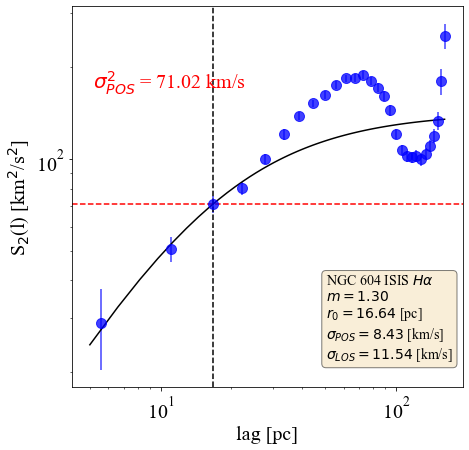

In [53]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.3

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 604 ISIS ' r'$H\alpha$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (DtRc["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtRc["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [54]:
SFHac=SF
SFHacn=SFn

1.4303999999999917


[None, None]

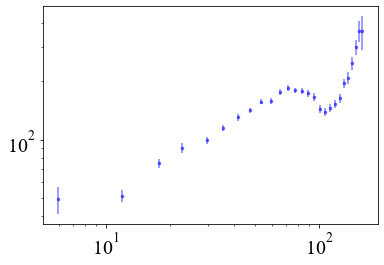

In [55]:
SF=sosf(DtBc)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [56]:
SFn=sosfn(DtBc)

1.4303999999999917


In [57]:
x=SF['Lag']
y=SF['Nmqvd']-(DtBc["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([17.59608365])

In [58]:
s=SFr[0]

In [59]:
ss=np.round((DtBc["RV"].std())**2,2)

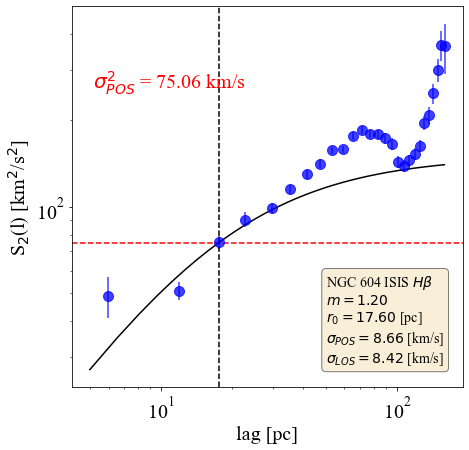

In [60]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.2

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 604 ISIS ' r'$Hβ$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (DtBc["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(DtBc["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [61]:
SFHb=SF
SFHbn=SFn

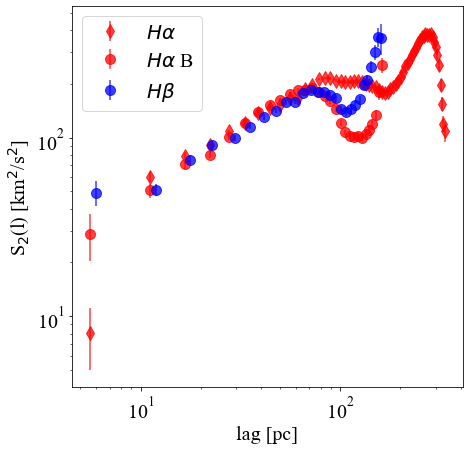

In [62]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SFHa.Lag,SFHa.Nmqvd, yerr=SFHa.ErrY, marker='d', fmt=' ',color="red", ecolor="red",
                     alpha=0.75, markersize=10,label=r'$Hα$')

ax.errorbar(SFHac.Lag,SFHac.Nmqvd, yerr=SFHac.ErrY, marker='o', fmt=' ',color="red", ecolor="red",
                     alpha=0.75, markersize=10,label=r'$Hα$ B')

ax.errorbar(SFHb.Lag,SFHb.Nmqvd, yerr=SFHb.ErrY, marker='o', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=10,label=r'$H\beta$')
plt.yscale('log')
plt.xscale('log')
ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
plt.legend()

<ipython-input-63-3433e2ad0c24>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(DtR[mPR]["Peak.0"]/DtR[mPR]["Peak.0"].max(),DtR[mPR]["Sig"],alpha=0.5,marker='+',color="red")


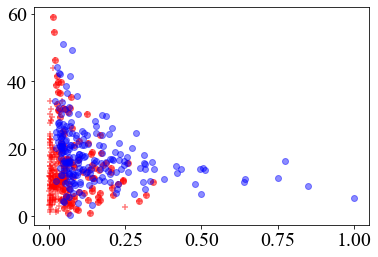

In [63]:
plt.scatter(DtR[mPR]["Peak.0"]/DtR[mPR]["Peak.0"].max(),DtR[mPR]["Sig"],alpha=0.5,marker='+',color="red")
plt.scatter(DtRc["Peak.0"]/DtRc["Peak.0"].max(),DtRc["Sig"],alpha=0.5,marker='o',color="red")
plt.scatter(DtBc["Peak.0"]/DtBc["Peak.0"].max(),DtBc["Sig"],alpha=0.45,marker='o',color="blue")

In [64]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 20.680939197540283 seconds ---
